In [1]:
import sys
import xml.etree.ElementTree as ET
import numpy as np
from  scipy.spatial.distance import cdist
import glob
import time
import cv2
import matplotlib.pyplot as plt 


xml = "/home/lukas/Videos/sugarbeet_2021/30_05_2021/2021-05-14_07-29-06_camera_1/41.xml"
img = cv2.imread("/home/lukas/Videos/sugarbeet_2021/30_05_2021/2021-05-14_07-29-06_camera_1/41.jpg")
folders = ["/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_08-11-51_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-20-57_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-31-19_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-50-33_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-26-09_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-48-56_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-25-17_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-27-18_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-37-17_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-58-30_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-29-15_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_08-21-39_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_08-10-55_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_08-08-09_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-23-58_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_08-29-34_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-59-59_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-57-18_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_08-15-24_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-44-41_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_08-17-00_camera_1.record",
    "/home/lukas/training_workspace/data/beet/TFRecords/2021-05-14_07-40-25_camera_1.record"]

In [4]:
def get_data_from_xml(xml):
    tree = ET.parse(xml)
    root = tree.getroot()
    num_objects = (len(root.findall('object')))
    bbox_array = np.empty([num_objects,4], dtype=int)
    object_type_list = []

    for idx,  annotation_object in enumerate(root.findall('object')):
        object_type = annotation_object.find('name').text
        object_type_list.append(object_type)
        bbox = annotation_object.find('bndbox')
        xmin = bbox.find('xmin').text
        ymin = bbox.find('ymin').text
        xmax = bbox.find('xmax').text
        ymax = bbox.find('ymax').text
        bbox_array[idx][:] = [xmin, ymin, xmax, ymax]
 
    return object_type_list, bbox_array

def calc_min_distance(points_2d):
    distance_mat = cdist(points_2d, points_2d)
    #print(distance_mat)
    min_distance = np.Inf   
    row_idx, col_idx = np.triu_indices(distance_mat.shape[0],1)
    for i in range(len(row_idx)):
        if distance_mat[row_idx[i], col_idx[i]] < min_distance:
            min_distance = distance_mat[row_idx[i], col_idx[i]]
  
    return min_distance


In [5]:
def bbox_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [6]:
object_types, bboxes = get_data_from_xml(xml)
left_upper_corner = bboxes[:,0:2]
right_upper_corner = bboxes[:,[2,1]]
left_lower_corner = bboxes[:,[0,3]]
right_lower_corner = bboxes[:,2:4]
print(right_lower_corner)
  
min_dist = calc_min_distance(left_lower_corner)
print(min_dist)
min_dist = calc_min_distance(left_upper_corner)
print(min_dist)
min_dist = calc_min_distance(right_lower_corner)
print(min_dist)
min_dist = calc_min_distance(right_upper_corner)
print(min_dist)

[[1002 1848]
 [1041   80]
 [2554 1785]
 [2796 1444]]
382.8276374558138
483.40148944743646
418.14471179246067
511.825165461801


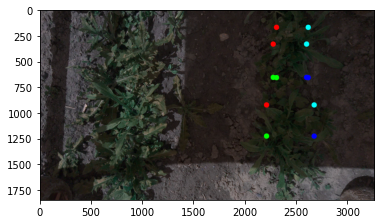

In [48]:
for corner in right_upper_corner:
    cv2.circle(img, (corner[0],corner[1]), 1, (0,255,255), 50)

plt.imshow(img)

In [43]:
folder = '/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1'

dist_threshold = 100

xml_list = glob.glob(folder + '/*.xml')
for xml in xml_list:
    object_types, bboxes = get_data_from_xml(xml)
    left_upper_corner = bboxes[:,0:2]
    right_upper_corner = bboxes[:,[2,1]]
    left_lower_corner = bboxes[:,[0,3]]
    right_lower_corner = bboxes[:,2:4]
    if calc_min_distance(left_lower_corner) < dist_threshold:
        print(xml)
    if calc_min_distance(left_upper_corner) < dist_threshold:
        print(xml)
    if calc_min_distance(right_lower_corner) < dist_threshold:
        print(xml)
    if calc_min_distance(right_upper_corner) < dist_threshold:
        print(xml)

/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/89.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/89.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/89.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/89.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/12.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/12.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/57.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/57.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/57.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/57.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/102.xml
/home/lukas/Videos/sugarbeet_2021/23_05_2021/2021-05-14_07-50-05_camera_1/102.xml
/home/lukas/Videos/sugarbe